<a href="https://colab.research.google.com/github/vettegonzales/ICT120_BSCS3A/blob/main/rule_based_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rule-based Chatbot

---



Rule-based chatbots are pretty straight forward. They are provided with a database of responses and are given a set of rules that help them match out an appropriate response from the provided database. They cannot generate their own answers but with an extensive database of answers and smartly designed rules, they can be very productive and useful.

##Building a Chatbot

This very simple rule based chatbot will work by searching for specific keywords in inputs given by a user. The keywords will be used to understand what action the user wants to take (user’s intent). Once the intent is identified, the bot will then pick out a response appropriate to the intent.

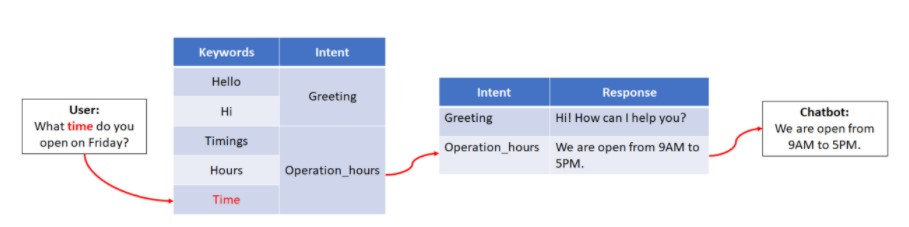

The list of keywords the bot will be searching for and the dictionary of responses will be built up manually based on the specific use case for the chatbot.

We’ll be designing a very simple chatbot for a Bank. The bot will be able to respond to greetings (Hi, Hello etc.) and will be able to answer questions about the bank’s hours of operation.

A flow of how the chatbot would process inputs is shown below;

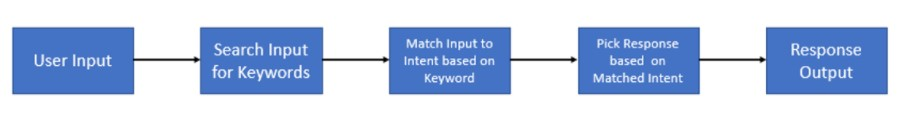

##We will be following the steps below to build our chatbot:

Importing Dependencies
Building the Keyword List
Building a dictionary of Intents
Defining a dictionary of responses
Matching Intents and Generating Responses

##Importing Dependencies

The first thing we’ll need to do is import the packages/libraries we’ll be using. re is the package that handles regular expression in Python. We’ll also be using WordNet from NLTK. WordNet is a lexical database that defines semantical relationships between words. We’ll be using WordNet to build up a dictionary of synonyms to our keywords. This will help us expand our list of keywords without manually having to introduce every possible word a user could use.



In [ ]:
# Importing modules

import re
from nltk.corpus import wordnet


##Building a List of Keywords

Once we have imported our libraries, we’ll need to build up a list of keywords that our chatbot will look for. This list can be as exhaustive as you want. The more keywords you have, the better your chatbot will perform.

As discussed previously, we’ll be using WordNet to build up a dictionary of synonyms to our keywords. For details about how WordNet is structured, visit their website.

In [ ]:
# Building a list of Keywords
import nltk
nltk.download('wordnet')

list_words=['hello','timings']
list_syn={}
for word in list_words:
    synonyms=[]
    for syn in wordnet.synsets(word):
        for lem in syn.lemmas():
            
            # Remove any special characters from synonym strings
            lem_name = re.sub('[^a-zA-Z0-9 \n\.]', ' ', lem.name())
            synonyms.append(lem_name)
   
    list_syn[word]=set(synonyms)
    
print (list_syn)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
{'hello': {'howdy', 'hullo', 'how do you do', 'hello', 'hi'}, 'timings': {'clock', 'timing', 'time'}}


Here, we first defined a list of words list_words that we will be using as our keywords. We used WordNet to expand our initial list with synonyms of the keywords. This list of keywords is stored in list_syn.

New keywords can simply be added to list_words. The chatbot will automatically pull their synonyms and add them to the keywords dictionary. You can also edit list_syn directly if you want to add specific words or phrases that you know your users will use.

## Building a Dictionary of Intents

Once our keywords list is complete, we need build up a dictionary that matches our keywords to intents. We also need to reformat the keywords in a special syntax that makes them visible to Regular Expression’s search function.

In [ ]:
# Building dictionary of Intents & Keywords
keywords={}
keywords_dict={}

# Defining a new key in the keywords dictionary
keywords['greet']=[]

# Populating the values in the keywords dictionary with synonyms of keywords formatted with RegEx metacharacters 
for synonym in list(list_syn['hello']):
    keywords['greet'].append('.*\\b'+synonym+'\\b.*')
 
# Defining a new key in the keywords dictionary
keywords['timings']=[]

# Populating the values in the keywords dictionary with synonyms of keywords formatted with RegEx metacharacters 
for synonym in list(list_syn['timings']):
    keywords['timings'].append('.*\\b'+synonym+'\\b.*')
 
for intent, keys in keywords.items():
    
    # Joining the values in the keywords dictionary with the OR (|) operator updating them in keywords_dict dictionary
    keywords_dict[intent]=re.compile('|'.join(keys))
print (keywords_dict)

{'greet': re.compile('.*\\bhowdy\\b.*|.*\\bhullo\\b.*|.*\\bhow do you do\\b.*|.*\\bhello\\b.*|.*\\bhi\\b.*'), 'timings': re.compile('.*\\bclock\\b.*|.*\\btiming\\b.*|.*\\btime\\b.*')}


The updated and formatted dictionary is stored in keywords_dict. The intent is the key and the string of keywords is the value of the dictionary.  

Let’s look at one key-value pair of the keywords_dict dictionary to understand the syntax of Regular Expression;


{'greet': re.compile('.*\\bhullo\\b.*|.*\\bhow-do-you-do\\b.*|.*\\bhowdy\\b.*|.*\\bhello\\b.*|.*\\bhi\\b.*') *italicized text*

Regular Expression uses specific patterns of special Meta-Characters to search for strings or sets of strings in an expression.

Since we need our chatbot to search for specific words in larger input strings we use the following sequences of meta-characters:

.*\\bhullo\\b.* *italicized text*

In this specific sequence, the keyword (hullo) is encased between a \b sequence. This tells the RegEx Search function that the search parameter is the keyword (hullo).

The first sequence \bhullo\b is encased between a period-star .* sequence. This sequence tells the RegEx Search function to search the entire input string from beginning to end for the search parameter (hullo).

In the dictionary, multiple such sequences are separated by the OR | operator. This operator tells the search function to look for any of the mentioned keywords in the input string.

More details about Regular Expression and its syntax can be found here.

You can add as many key-value pairs to the dictionary as you want to increase the functionality of the chatbot.

## Defining Responses

The next step is defining responses for each intent type. This part is very straightforward. The responses are described in another dictionary with the intent being the key.

We’ve also added a fallback intent and its response. This is a fail-safe response in case the chatbot is unable to extract any relevant keywords from the user input.

In [ ]:
# Building a dictionary of responses
responses={
    'greet':'Hello! How can I help you?',
    'timings':'We are open from 9AM to 5PM, Monday to Friday. We are closed on weekends and public holidays.',
    'ask': 'How can I open a bank account?.',
    'fallback':'I dont quite understand. Could you repeat that?',
    
}

##Matching Intents and Generating Responses

Now that we have the back-end of the chatbot completed, we’ll move on to taking an input from the user and searching the input string for our keywords.

We use the RegEx Search function to search the user input for keywords stored in the value field of the keywords_dict dictionary.  If you recall, the values in the keywords_dict dictionary were formatted with special sequences of meta-characters. RegEx’s search function uses those sequences to compare the patterns of characters in the keywords with patterns of characters in the input string.

If a match is found, the current intent gets selected and is used as the key to the responses dictionary to select the correct response.

In [ ]:
print ("Welcome to MyBank. How may I help you?")

# While loop to run the chatbot indefinetely
while (True):  
    
    # Takes the user input and converts all characters to lowercase
    user_input = input().lower()
    
    # Defining the Chatbot's exit condition
    if user_input == 'quit': 
        print ("Thank you for visiting.")
        break    
    
    matched_intent = None 
    
    for intent,pattern in keywords_dict.items():
        
        # Using the regular expression search function to look for keywords in user input
        if re.search(pattern, user_input): 
            
            # if a keyword matches, select the corresponding intent from the keywords_dict dictionary
            matched_intent=intent  
    
    # The fallback intent is selected by default
    key='fallback' 
    if matched_intent in responses:
        
        # If a keyword matches, the fallback intent is replaced by the matched intent as the key for the responses dictionary
        key = matched_intent 
    
    # The chatbot prints the response that matches the selected intent
    print (responses[key]) 

Welcome to MyBank. How may I help you?
I dont quite understand. Could you repeat that?
Thank you for visiting.


###References:
https://blog.datasciencedojo.com/building-a-rule-based-chatbot-in-python/
